# Machine Learning
## 1.Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
#create a data
#input (x)
experience = np.array([[1],[2],[3],[4],[5],[6]])
#output (y)
salary = np.array([40000,42000,44000,46000,48000,50000])

In [ ]:
# Create the model
model = LinearRegression()

In [ ]:
# Create train the model
model.fit(experience,salary)

LinearRegression()

In [ ]:
# Predict salary for the 7 years of expreince
predicted_salary = model.predict([[7]])
print(predicted_salary)

[52000.]


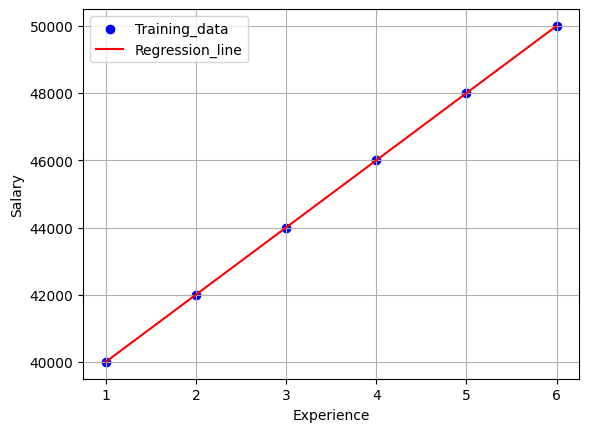

In [ ]:
# plot the data and the regression line
plt.scatter(experience,salary, color='blue', label='Training_data')
plt.plot(experience, model.predict(experience), color='red', label='Regression_line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

## 2.Logistic Regression

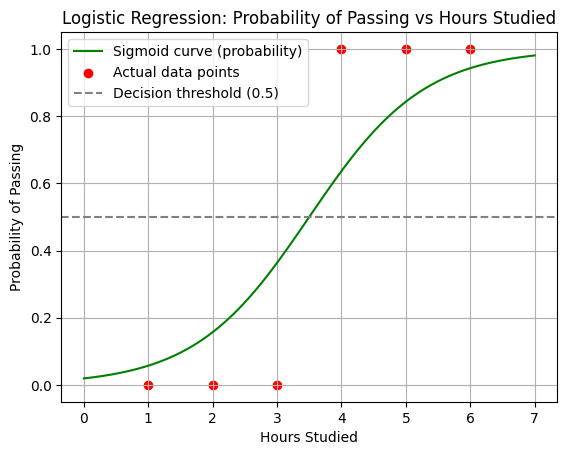

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Sample data
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([0, 0, 0, 1, 1, 1])

# Train the model
model = LogisticRegression()
model.fit(X, y)

# Make prediction for a range of hours (from 0 to 7)
X_test = np.linspace(0, 7, 100).reshape(-1, 1)
probabilities = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (pass)

# Plot the sigmoid curve
plt.plot(X_test, probabilities, color='green', label='Sigmoid curve (probability)')
plt.scatter(X, y, color='red', label='Actual data points')
plt.axhline(0.5, color='gray', linestyle='--', label='Decision threshold (0.5)')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Probability of Passing vs Hours Studied')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Step 1: Create the data
X = np.array([[1], [2], [3], [4], [5], [6]])   # Hours studied
y = np.array([0, 0, 0, 1, 1, 1])               # Passed or not

# Step 2: Create the model
model = LogisticRegression()

# Step 3: Train the model
model.fit(X, y)

# Step 4: Predict for a new student who studied 3.5 hours
prediction = model.predict([[3.5]])
probability = model.predict_proba([[3.5]])

print("Will the student pass?", "Yes" if prediction[0] == 1 else "No")
print("Probability of passing:", f"{probability[0][1]*100:.2f}%")

Will the student pass? Yes
Probability of passing: 50.00%


## The Titanic Dataset - Predict Who survived the shipwreck

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# step 1: load titanic dataset from seabron(alternative to kaggle)
import seaborn as sns
titanic = sns.load_dataset('titanic')

#step 2: select relevant columns
df = titanic[['survived','pclass','sex','age','fare']].dropna()

#step 3: Convert the sex to numeric (male=1 , female=0)
df['sex'] = df['sex'].map({'male':1,'female':0})

#step 4: Split the data into training and testing sets
X = df[['pclass','sex','age','fare']]
y = df['survived']

#step 5: train_test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#step 6: Create and train Logistic regression model
model = LogisticRegression()
model.fit(X_train,y_train)

#step 7: predict and evaluate
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test,prediction)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 75.52%


In [ ]:
#Optional: predict survival for a custom passenger
# Example: 2nd class, female, 30 yrs, fare = $50
custom_passenger = [[2, 0, 30, 50]]
custom_prediction = model.predict(custom_passenger)
print("Survival prediction:", "Survived" if custom_prediction[0] == 1 else "Did not survive")

Survival prediction: Survived


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


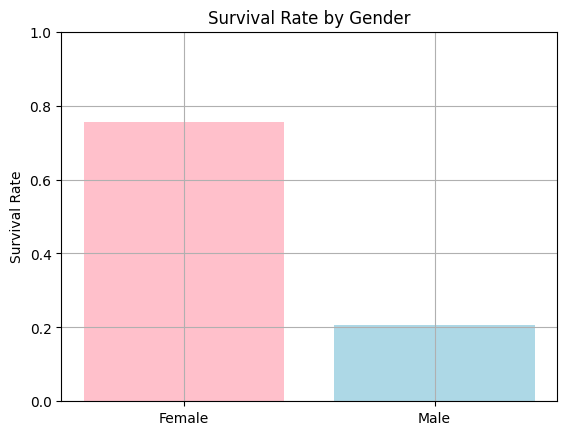

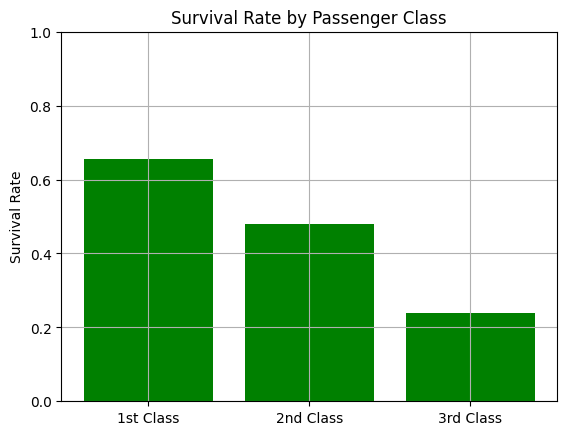

In [ ]:
import matplotlib.pyplot as plt

# Plot survival by gender
survival_by_gender = df.groupby('sex')['survived'].mean()
labels = ['Female', 'Male']
plt.bar(labels, survival_by_gender, color=['pink', 'lightblue'])
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Plot survival by class
survival_by_class = df.groupby('pclass')['survived'].mean()
classes = ['1st Class', '2nd Class', '3rd Class']
plt.bar(classes, survival_by_class, color='green')
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

## 3.K-Nearest Neighbor(KNN)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
# step 1: load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# step 2: split into train/test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# step 3: Create the KNN model(using 3 neighbors)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

# step 4: Predict and evaluate
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test,prediction)

print(f"Accuracy: {accuracy*100:.2f}%")

#step 5: predict a new flower type
new_flower = [[5.1,3.5,1.4,0.2]]
predicted_type = model.predict(new_flower)
print(f"Predicted flower type: {iris.target_names[predicted_type[0]]}")

Accuracy: 100.00%
Predicted flower type: setosa


Predicted flower type: versicolor


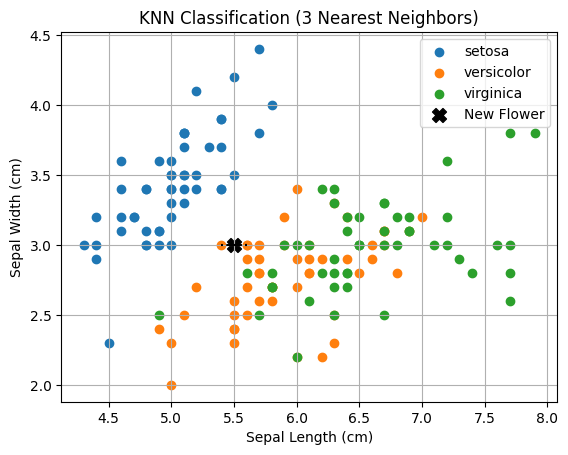

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Load the iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Take only the first 2 features (sepal length & width)
y = iris.target
target_names = iris.target_names

# Train KNN model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

# Create a test point (new flower)
new_point = np.array([[5.5, 3.0]])

# Predict the class
predicted_class = model.predict(new_point)[0]
print("Predicted flower type:", target_names[predicted_class])

# Find 3 nearest neighbors
distances, indices = model.kneighbors(new_point)

# Plot original data
for i, label in enumerate(np.unique(y)):
    plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=target_names[label])

# Plot the new point
plt.scatter(new_point[0][0], new_point[0][1], color='black', marker='X', s=100, label='New Flower')

# Draw lines to neighbors
for index in indices[0]:
    plt.plot([new_point[0][0], X[index][0]], [new_point[0][1], X[index][1]], 'k--')

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("KNN Classification (3 Nearest Neighbors)")
plt.legend()
plt.grid(True)
plt.show()

## second example

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [3]:
x = np.array([
    [1,169,8.6],
    [1,148,8.8],
    [0,142,8.3],
    [0,134,7.9],
    [1,121,7.7],
    [0,195,9.3],
])

y = np.array([
    "Interstellar",
    "Inception",
    "the pursuit of happyness",
    "forset gump",
    "the martain",
    "the shawshank redemption"
])

new_movie = np.array([[1,150,8.5]])

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)

predicted_movie = knn.predict(new_movie)
print(f"Predicted Movie: {predicted_movie[0]}")

Predicted Movie: Inception


## 4. Decision Tree

Model Accuracy: 74.83%


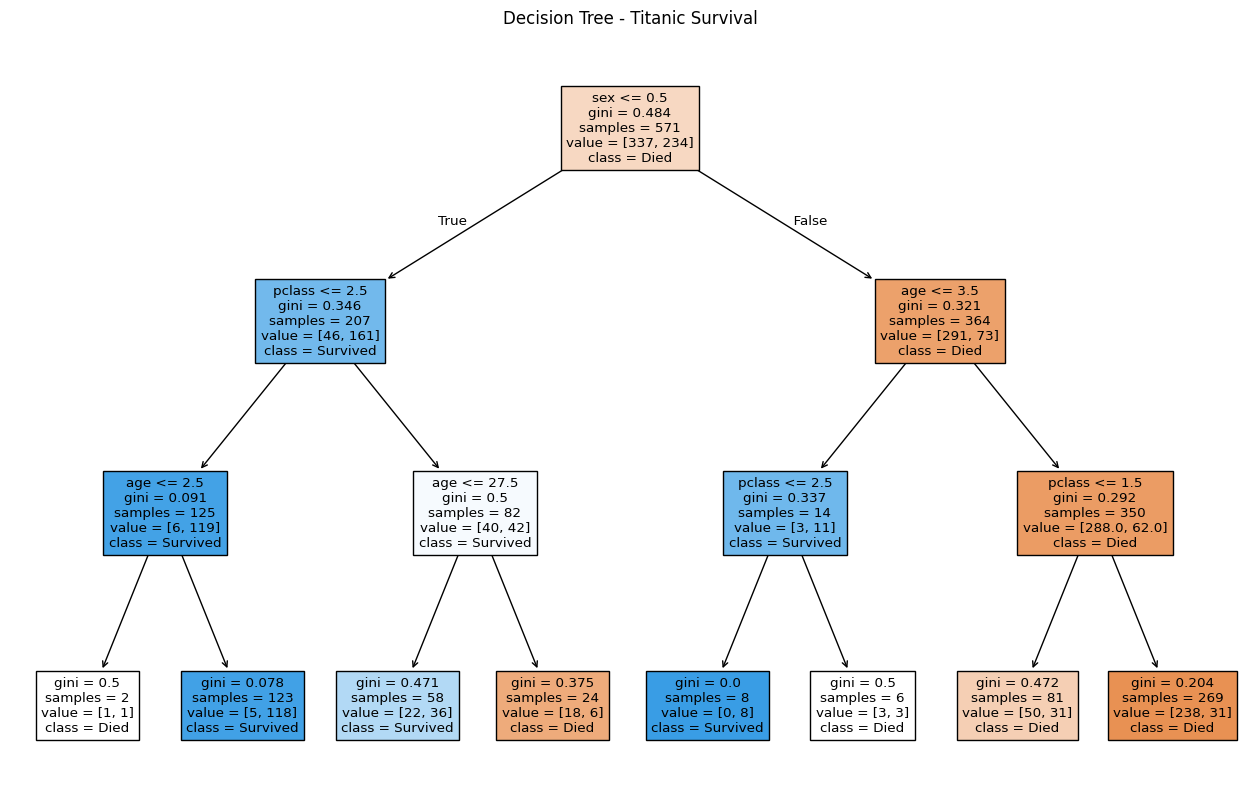

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Select and clean data
df = df[['survived', 'pclass', 'sex', 'age', 'fare']].dropna()
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Features and target
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=3)  # Limit depth for clarity
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Plot the decision tree
plt.figure(figsize=(16, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.title("Decision Tree - Titanic Survival")
plt.show()

## 5.Random Forset

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Select and clean data
df = df[['survived', 'pclass', 'sex', 'age', 'fare']].dropna()
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Features and target
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

# Predict for a custom passenger (2nd class, female, 30 years, $50 fare)
sample = [[2, 0, 30, 50]]
pred = rf_model.predict(sample)[0]
print("Prediction for sample passenger:", "Survived" if pred == 1 else "Did not survive")

Random Forest Accuracy: 78.32%
Prediction for sample passenger: Survived


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


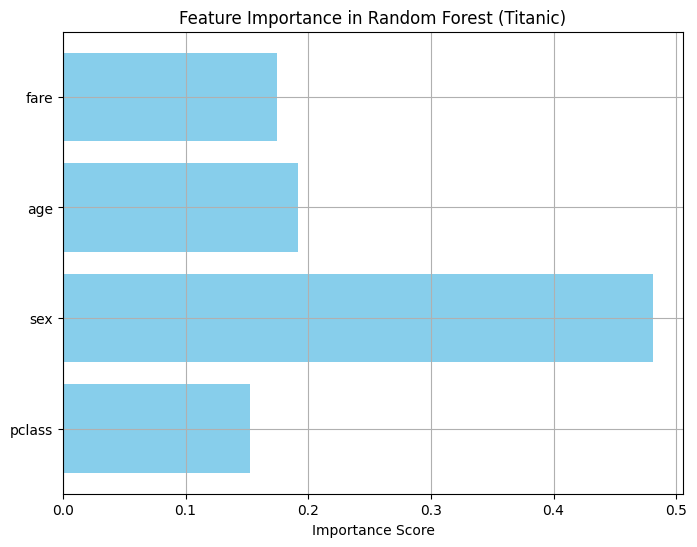

In [6]:
import matplotlib.pyplot as plt

# Get feature importance from the Random Forest model
importances = rf_model.feature_importances_
features = X.columns

# Plotting the feature importance
plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importance in Random Forest (Titanic)")
plt.grid(True)
plt.show()

## 6.Naive Bayes

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Select and clean data
df = df[['survived', 'pclass', 'sex', 'age', 'fare']].dropna()
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Features and target
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy * 100:.2f}%")

# Predict for a custom passenger
sample = [[2, 0, 30, 50]]  # 2nd class, female, age 30, fare 50
pred = nb_model.predict(sample)[0]
print("Prediction for sample passenger:", "Survived" if pred == 1 else "Did not survive")

Naive Bayes Accuracy: 74.13%
Prediction for sample passenger: Survived


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


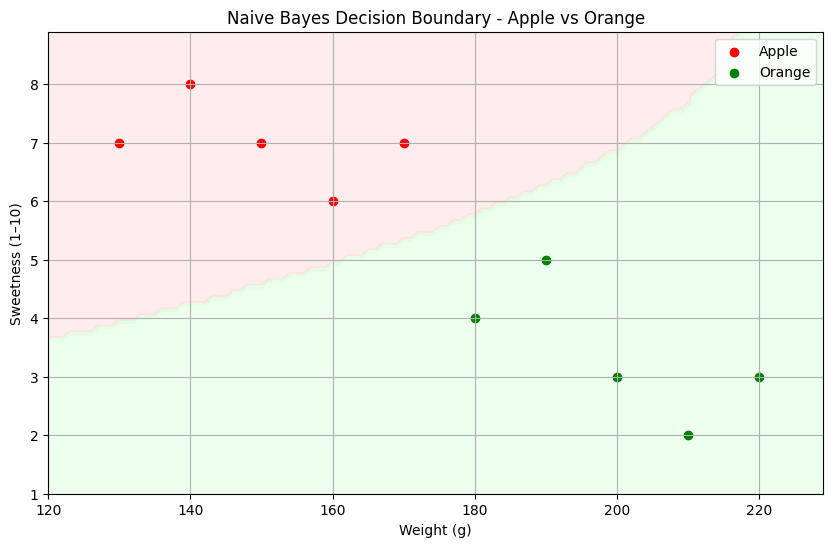

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap

# Simulated fruit dataset (Weight, Sweetness)
X = np.array([
    [150, 7],  # Apple
    [160, 6],
    [140, 8],
    [170, 7],
    [130, 7],
    [180, 4],  # Orange
    [190, 5],
    [200, 3],
    [210, 2],
    [220, 3]
])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # 0 = Apple, 1 = Orange

# Train Naive Bayes model
model = GaussianNB()
model.fit(X, y)

# Create a mesh grid to plot decision boundary
x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
cmap = ListedColormap(['#ffdddd', '#ddffdd'])
plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)

# Plot data points
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Apple', color='red')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Orange', color='green')

plt.xlabel("Weight (g)")
plt.ylabel("Sweetness (1–10)")
plt.title("Naive Bayes Decision Boundary - Apple vs Orange")
plt.legend()
plt.grid(True)
plt.show()

## 7.SVM

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Select and clean data
df = df[['survived', 'pclass', 'sex', 'age', 'fare']].dropna()
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Features and labels
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_model = SVC(kernel='linear')  # Try 'rbf' or 'poly' later
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy * 100:.2f}%")

# Predict a sample person
sample = [[2, 0, 30, 50]]  # 2nd class, female, 30 yrs, $50 fare
pred = svm_model.predict(sample)[0]
print("Prediction for sample passenger:", "Survived" if pred == 1 else "Did not survive")

SVM Accuracy: 73.43%
Prediction for sample passenger: Survived


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


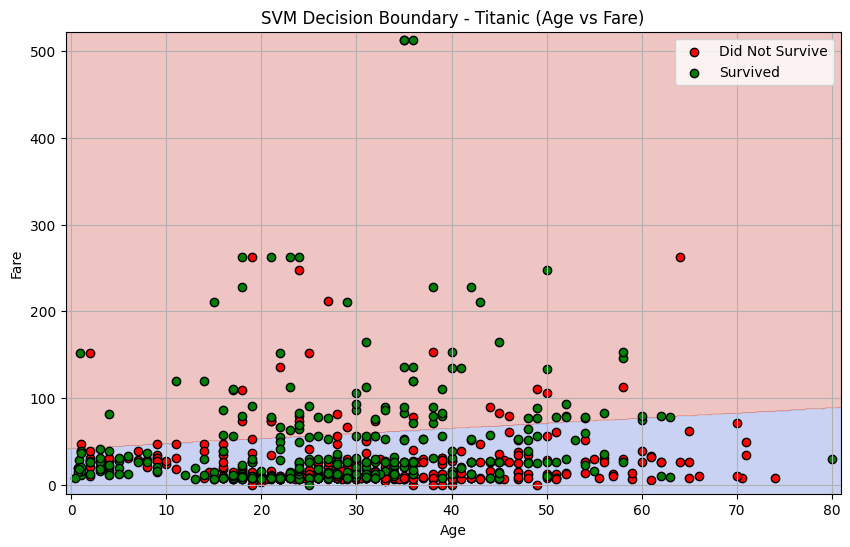

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Select and clean data (only 'age' and 'fare' for 2D plot)
df = df[['survived', 'age', 'fare']].dropna()

# Features and labels
X = df[['age', 'fare']]
y = df['survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Create meshgrid for plotting decision boundary
x_min, x_max = X['age'].min() - 1, X['age'].max() + 1
y_min, y_max = X['fare'].min() - 10, X['fare'].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 1))

# Predict on meshgrid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot actual data points
plt.scatter(X[y == 0]['age'], X[y == 0]['fare'], color='red', label='Did Not Survive', edgecolor='k')
plt.scatter(X[y == 1]['age'], X[y == 1]['fare'], color='green', label='Survived', edgecolor='k')

plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("SVM Decision Boundary - Titanic (Age vs Fare)")
plt.legend()
plt.grid(True)
plt.show()

## 🎨 Colored zones = where SVM predicts Survived vs Not Survived

## 🔴 Red dots = people who did not survive

## 🟢 Green dots = people who survived

## 🧱 SVM draws a straight line between the groups (because we used kernel='linear')

##  **K-Means Clustering**

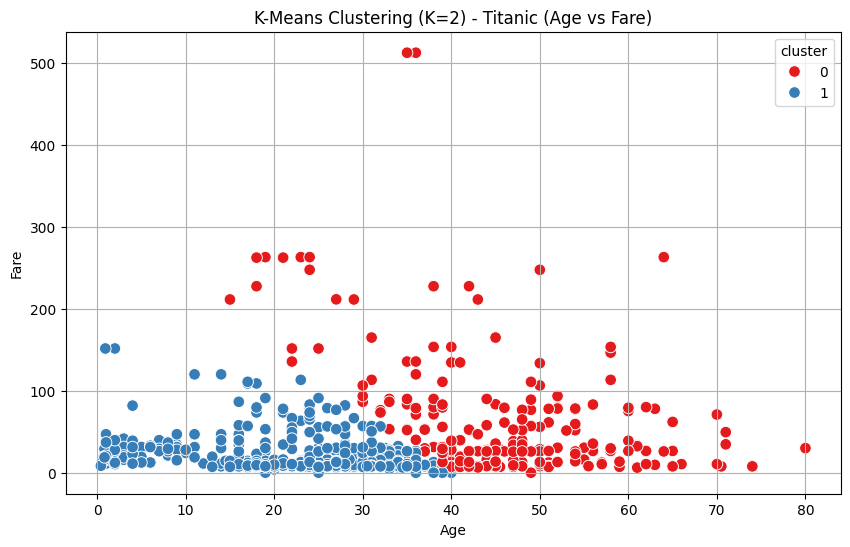

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Use only numeric features: Age and Fare (simplified for 2D)
df = df[['age', 'fare']].dropna()

# Scale the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply K-Means with K=2 (you can try 3, 4, etc.)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Get predicted cluster labels
df['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='fare', hue='cluster', palette='Set1', s=70)
plt.title("K-Means Clustering (K=2) - Titanic (Age vs Fare)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.grid(True)
plt.show()


## What You'll See:
##Each passenger is a dot

## Dots are grouped into 2 clusters (colored red & blue)

## Clustering is based on similarity, not labels

## **PCA (Principal Component Analysis)**

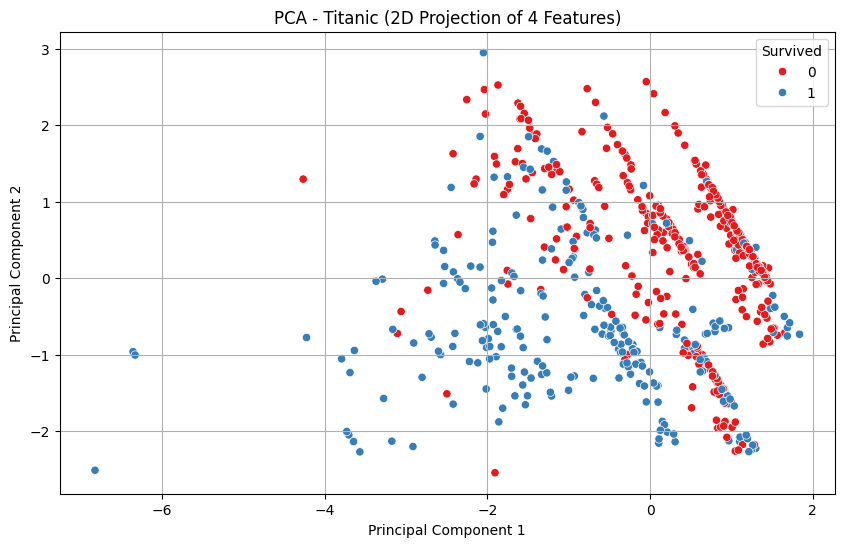

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Titanic dataset
df = sns.load_dataset('titanic')
df = df[['survived', 'pclass', 'sex', 'age', 'fare']].dropna()
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Features and labels
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Survived'] = y.values

# Plot the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Survived', palette='Set1')
plt.title("PCA - Titanic (2D Projection of 4 Features)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


## Each dot = a passenger

## Red = Did not survive

## Blue = Survived

## Dots are positioned based on PCA — a mix of age, sex, fare, class



In [2]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Retained:", sum(pca.explained_variance_ratio_))


Explained Variance Ratio: [0.43886049 0.27997869]
Total Variance Retained: 0.7188391803887431


If you see something like 0.74, it means PCA kept 74% of the important patterns using just 2 components